In [1]:
import cpa
import matplotlib.pyplot as plt
import numpy as np
import os 
import scanpy as sc
import seaborn as sns
import torch
from cpa.data import load_dataset_splits
sc.set_figure_params(dpi=100, frameon=False)
sc.logging.print_header()

%load_ext autoreload
%autoreload 2

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.21.5 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.6


In [2]:
adata = sc.read('../datasets/kang.h5ad')
adata.obs['split'] = adata.obs['split'].astype(str)

In [3]:
preds_mse = {}
preds_sampled = {}
preds = {}
for ct in adata.obs['cell_type'].unique():
    print(ct)
    preds_sampled[ct] = sc.read(f'../seml/kang_adatas/{ct}_gauss_pred_sampled.h5ad')
    preds[ct] = sc.read(f'../seml/kang_adatas/{ct}_gauss_pred.h5ad')

CD14 Mono
CD4 Memory T
T activated
CD4 Naive T
CD8 T
B Activated
B
DC
CD16 Mono
NK


In [4]:
stim_adatas = {}
orig_adatas = {}
for ct in adata.obs['cell_type'].unique():
    orig_adatas[ct] = adata[(adata.obs['cell_type'] == ct) & (adata.obs['condition'] == 'control')]
    stim_adatas[ct] = adata[(adata.obs['cell_type'] == ct) & (adata.obs['condition'] == 'stimulated')]

In [44]:
adatas = []
for ct in adata.obs['cell_type'].unique():
    orig_adatas[ct].obs['model'] = f'{ct} (control)'
    stim_adatas[ct].obs['model'] = f'{ct} (stim)'
    preds[ct].obs['model'] = f'{ct}_likelihood'
    preds_sampled[ct].obs['model'] = f'{ct} (cpa)'
    adata_loop = orig_adatas[ct].concatenate(
        [stim_adatas[ct], preds[ct], preds_sampled[ct]]
    )
    adatas.append(adata_loop)

In [45]:
adata_preds = adatas[0].concatenate(adatas[1:])

In [46]:
adata_preds.obs.model.unique()

array(['CD14 Mono (control)', 'CD14 Mono (stim)', 'CD14 Mono_likelihood',
       'CD14 Mono (cpa)', 'CD4 Memory T (control)', 'CD4 Memory T (stim)',
       'CD4 Memory T_likelihood', 'CD4 Memory T (cpa)',
       'T activated (control)', 'T activated (stim)',
       'T activated_likelihood', 'T activated (cpa)',
       'CD4 Naive T (control)', 'CD4 Naive T (stim)',
       'CD4 Naive T_likelihood', 'CD4 Naive T (cpa)', 'CD8 T (control)',
       'CD8 T (stim)', 'CD8 T_likelihood', 'CD8 T (cpa)',
       'B Activated (control)', 'B Activated (stim)',
       'B Activated_likelihood', 'B Activated (cpa)', 'B (control)',
       'B (stim)', 'B_likelihood', 'B (cpa)', 'DC (control)', 'DC (stim)',
       'DC_likelihood', 'DC (cpa)', 'CD16 Mono (control)',
       'CD16 Mono (stim)', 'CD16 Mono_likelihood', 'CD16 Mono (cpa)',
       'NK (control)', 'NK (stim)', 'NK_likelihood', 'NK (cpa)'],
      dtype=object)

In [47]:
genes = ['CCL8', 'APOBEC3A', 'CCL2', 'CXCL10', 'IDO1', 'ISG15', 'CXCL11', 'IFITM3', 'RSAD2', 'IL1RN']

In [48]:
plt.rcParams['figure.dpi'] = 600
sc.pl.stacked_violin(
    adata_preds[adata_preds.obs['model'].str.contains("control|stimulated|cpa", regex=True)],
    groupby='model',
    var_names=genes,
    swap_axes=True,
    #var_group_positions=[
    #    (i+1, i+4) 
    #    for i in np.arange(
    #        len(
    #            adata_preds[
    #                adata_preds
    #                .obs['model']
    #                .str
    #                .contains("control|stimulated|sampled", regex=True)
    #            ]
    #            .obs['model']
    #            .unique()
    #        ) - 9,
    #        step=3,
    #    )
    #],
    obs_group_positions=[(1, 4)],
    figsize=(15, 10),
    save='kang_violinplot.pdf',
)

Trying to set attribute `.obs` of view, copying.
... storing 'orig.ident' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'stim' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'seurat_annotations' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'condition' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'split' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cov_drug_dose_name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'covars_comb' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'model' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'closest_cond_cosine' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'closest_cond_euclidean' as categorical


In [19]:
[
        (i, i+3) 
        for i in np.arange(
            len(
                adata_preds[
                    adata_preds
                    .obs['model']
                    .str
                    .contains("control|stimulated|sampled", regex=True)
                ]
                .obs['model']
                .unique()
            ),
            step=3,
        )
    ]

[(0, 3),
 (3, 6),
 (6, 9),
 (9, 12),
 (12, 15),
 (15, 18),
 (18, 21),
 (21, 24),
 (24, 27),
 (27, 30)]

Trying to set attribute `.obs` of view, copying.
... storing 'orig.ident' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'stim' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'seurat_annotations' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'condition' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'split' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cov_drug_dose_name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'covars_comb' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'model' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'closest_cond_cosine' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'closest_cond_euclidean' as categorical


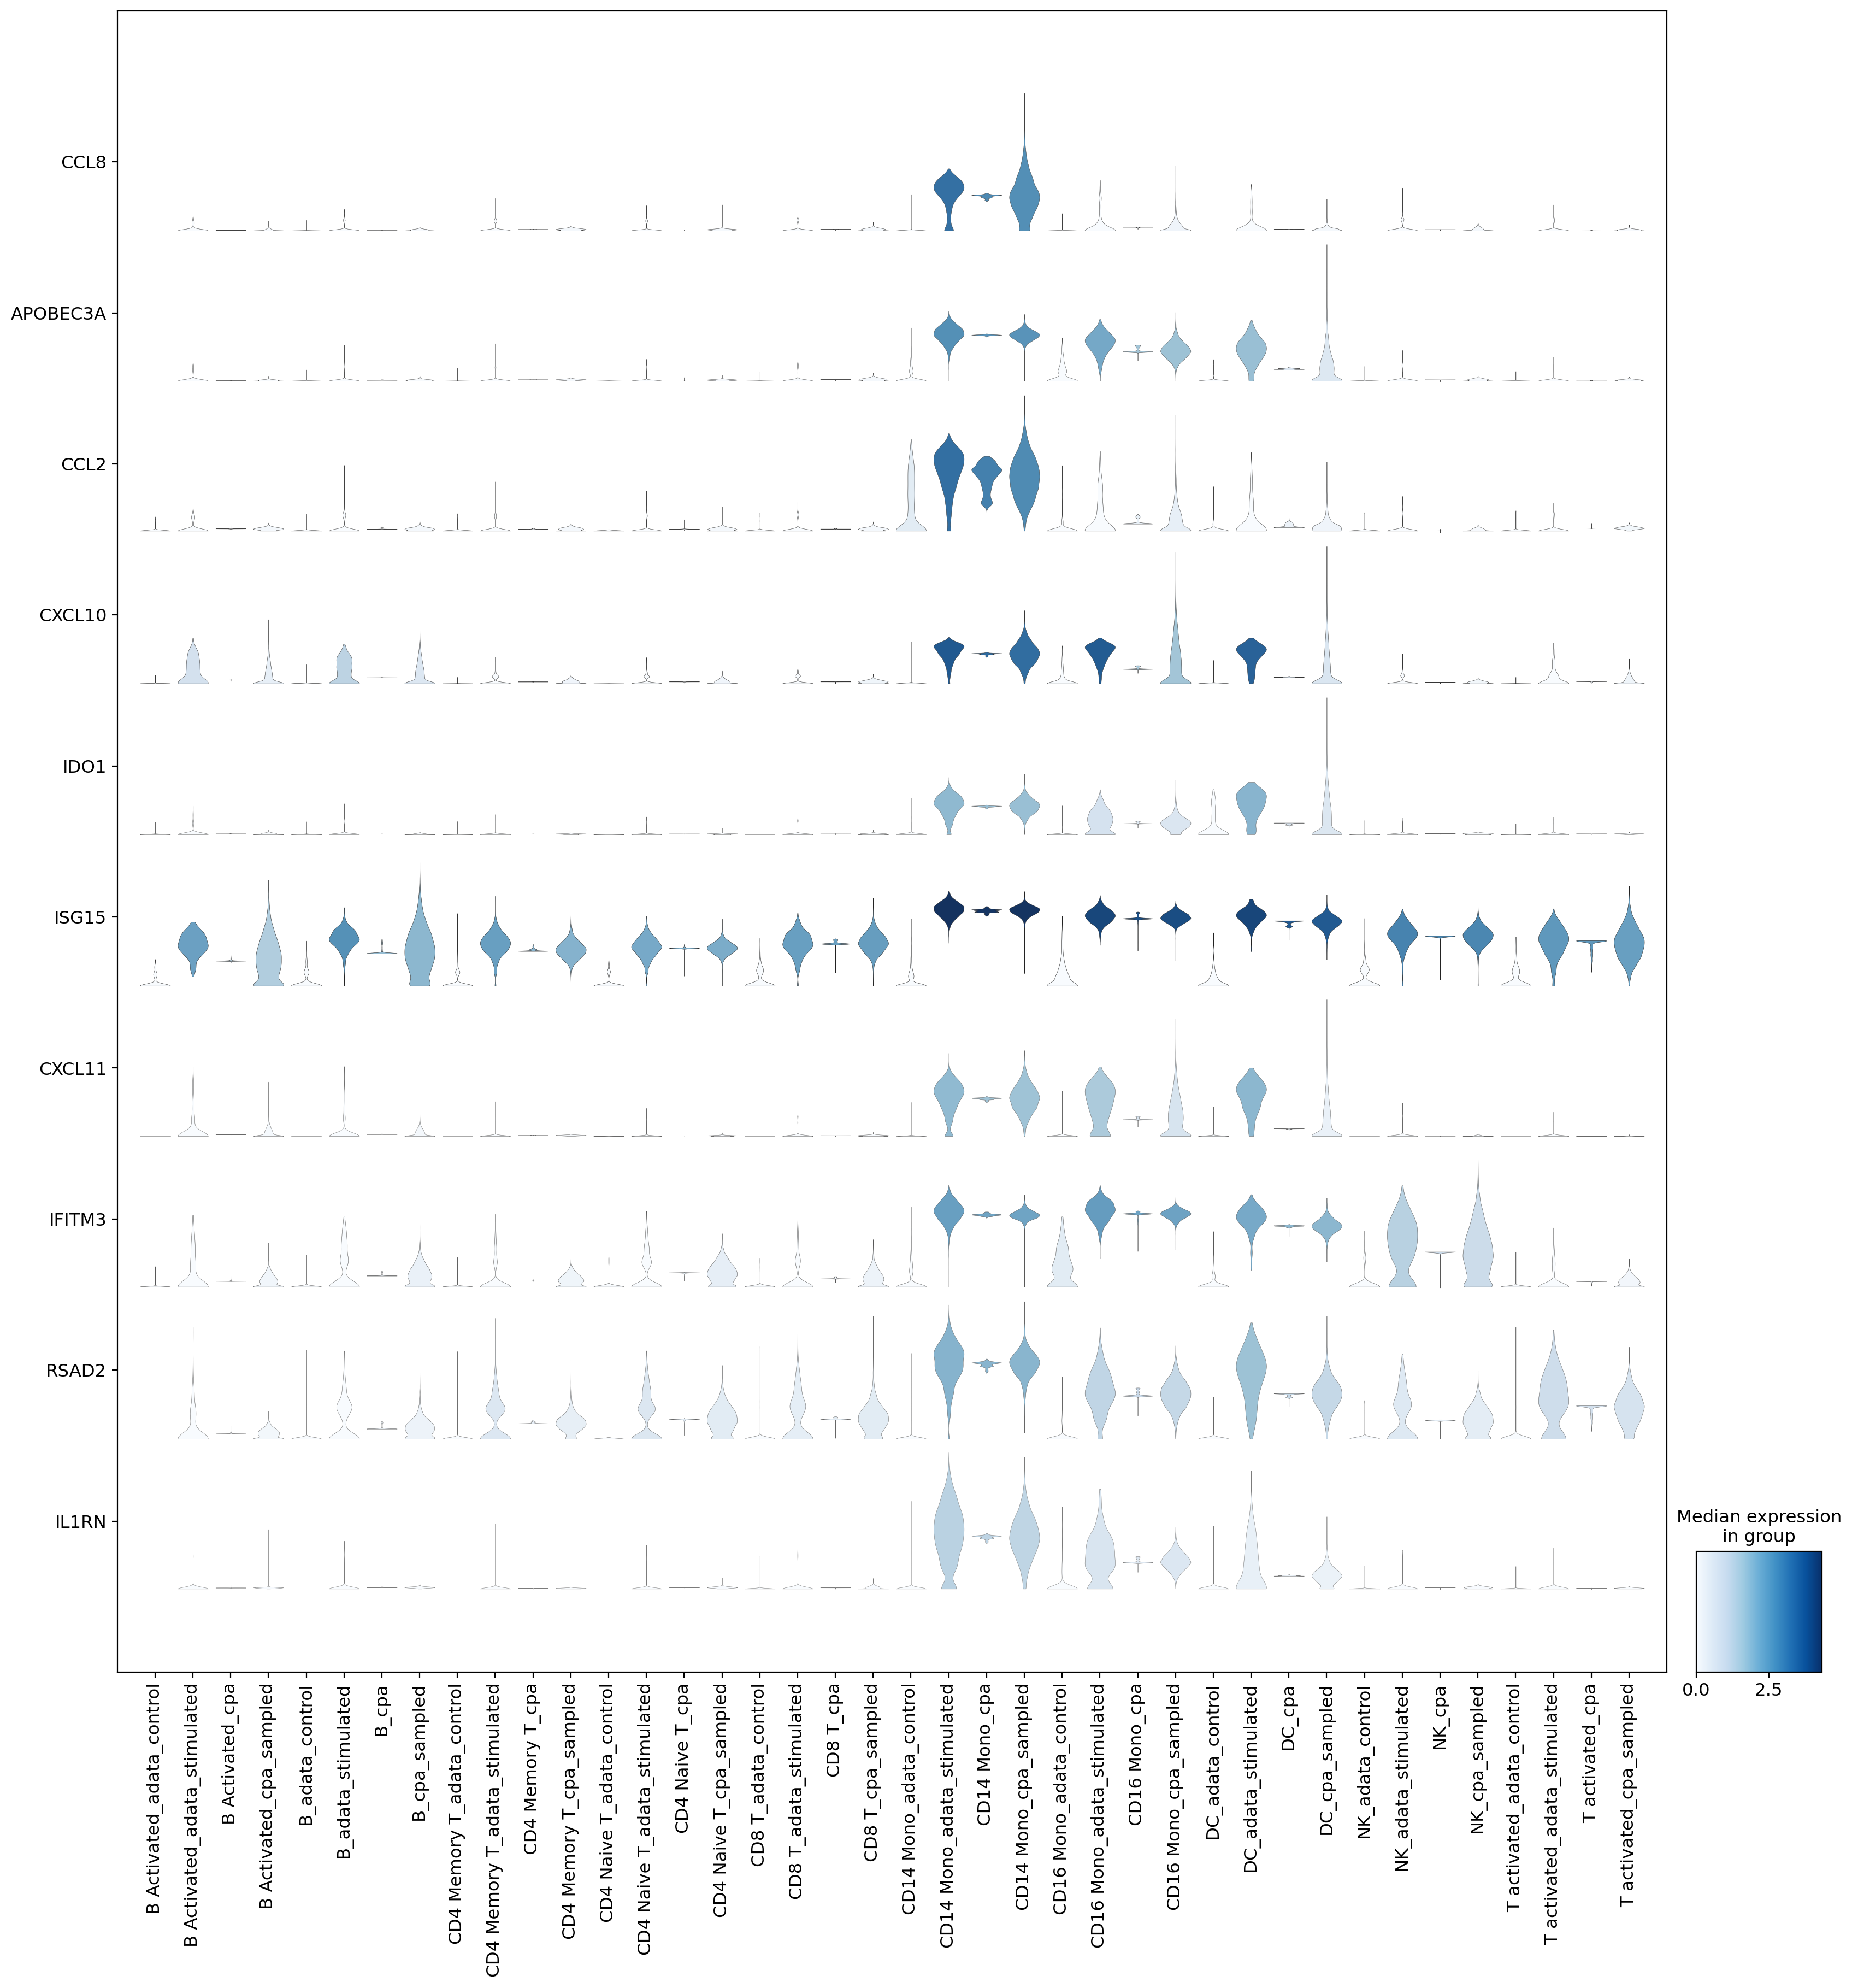

In [44]:
sc.pl.stacked_violin(
    adata_preds[adata_preds.obs['model'].str.contains("control|stimulated|cpa", regex=True)],
    groupby='model',
    var_names=genes,
    swap_axes=True,
    figsize=(20, 20)
)

Trying to set attribute `.obs` of view, copying.
... storing 'orig.ident' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'stim' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'seurat_annotations' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'condition' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'split' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cov_drug_dose_name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'covars_comb' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'model' as categorical


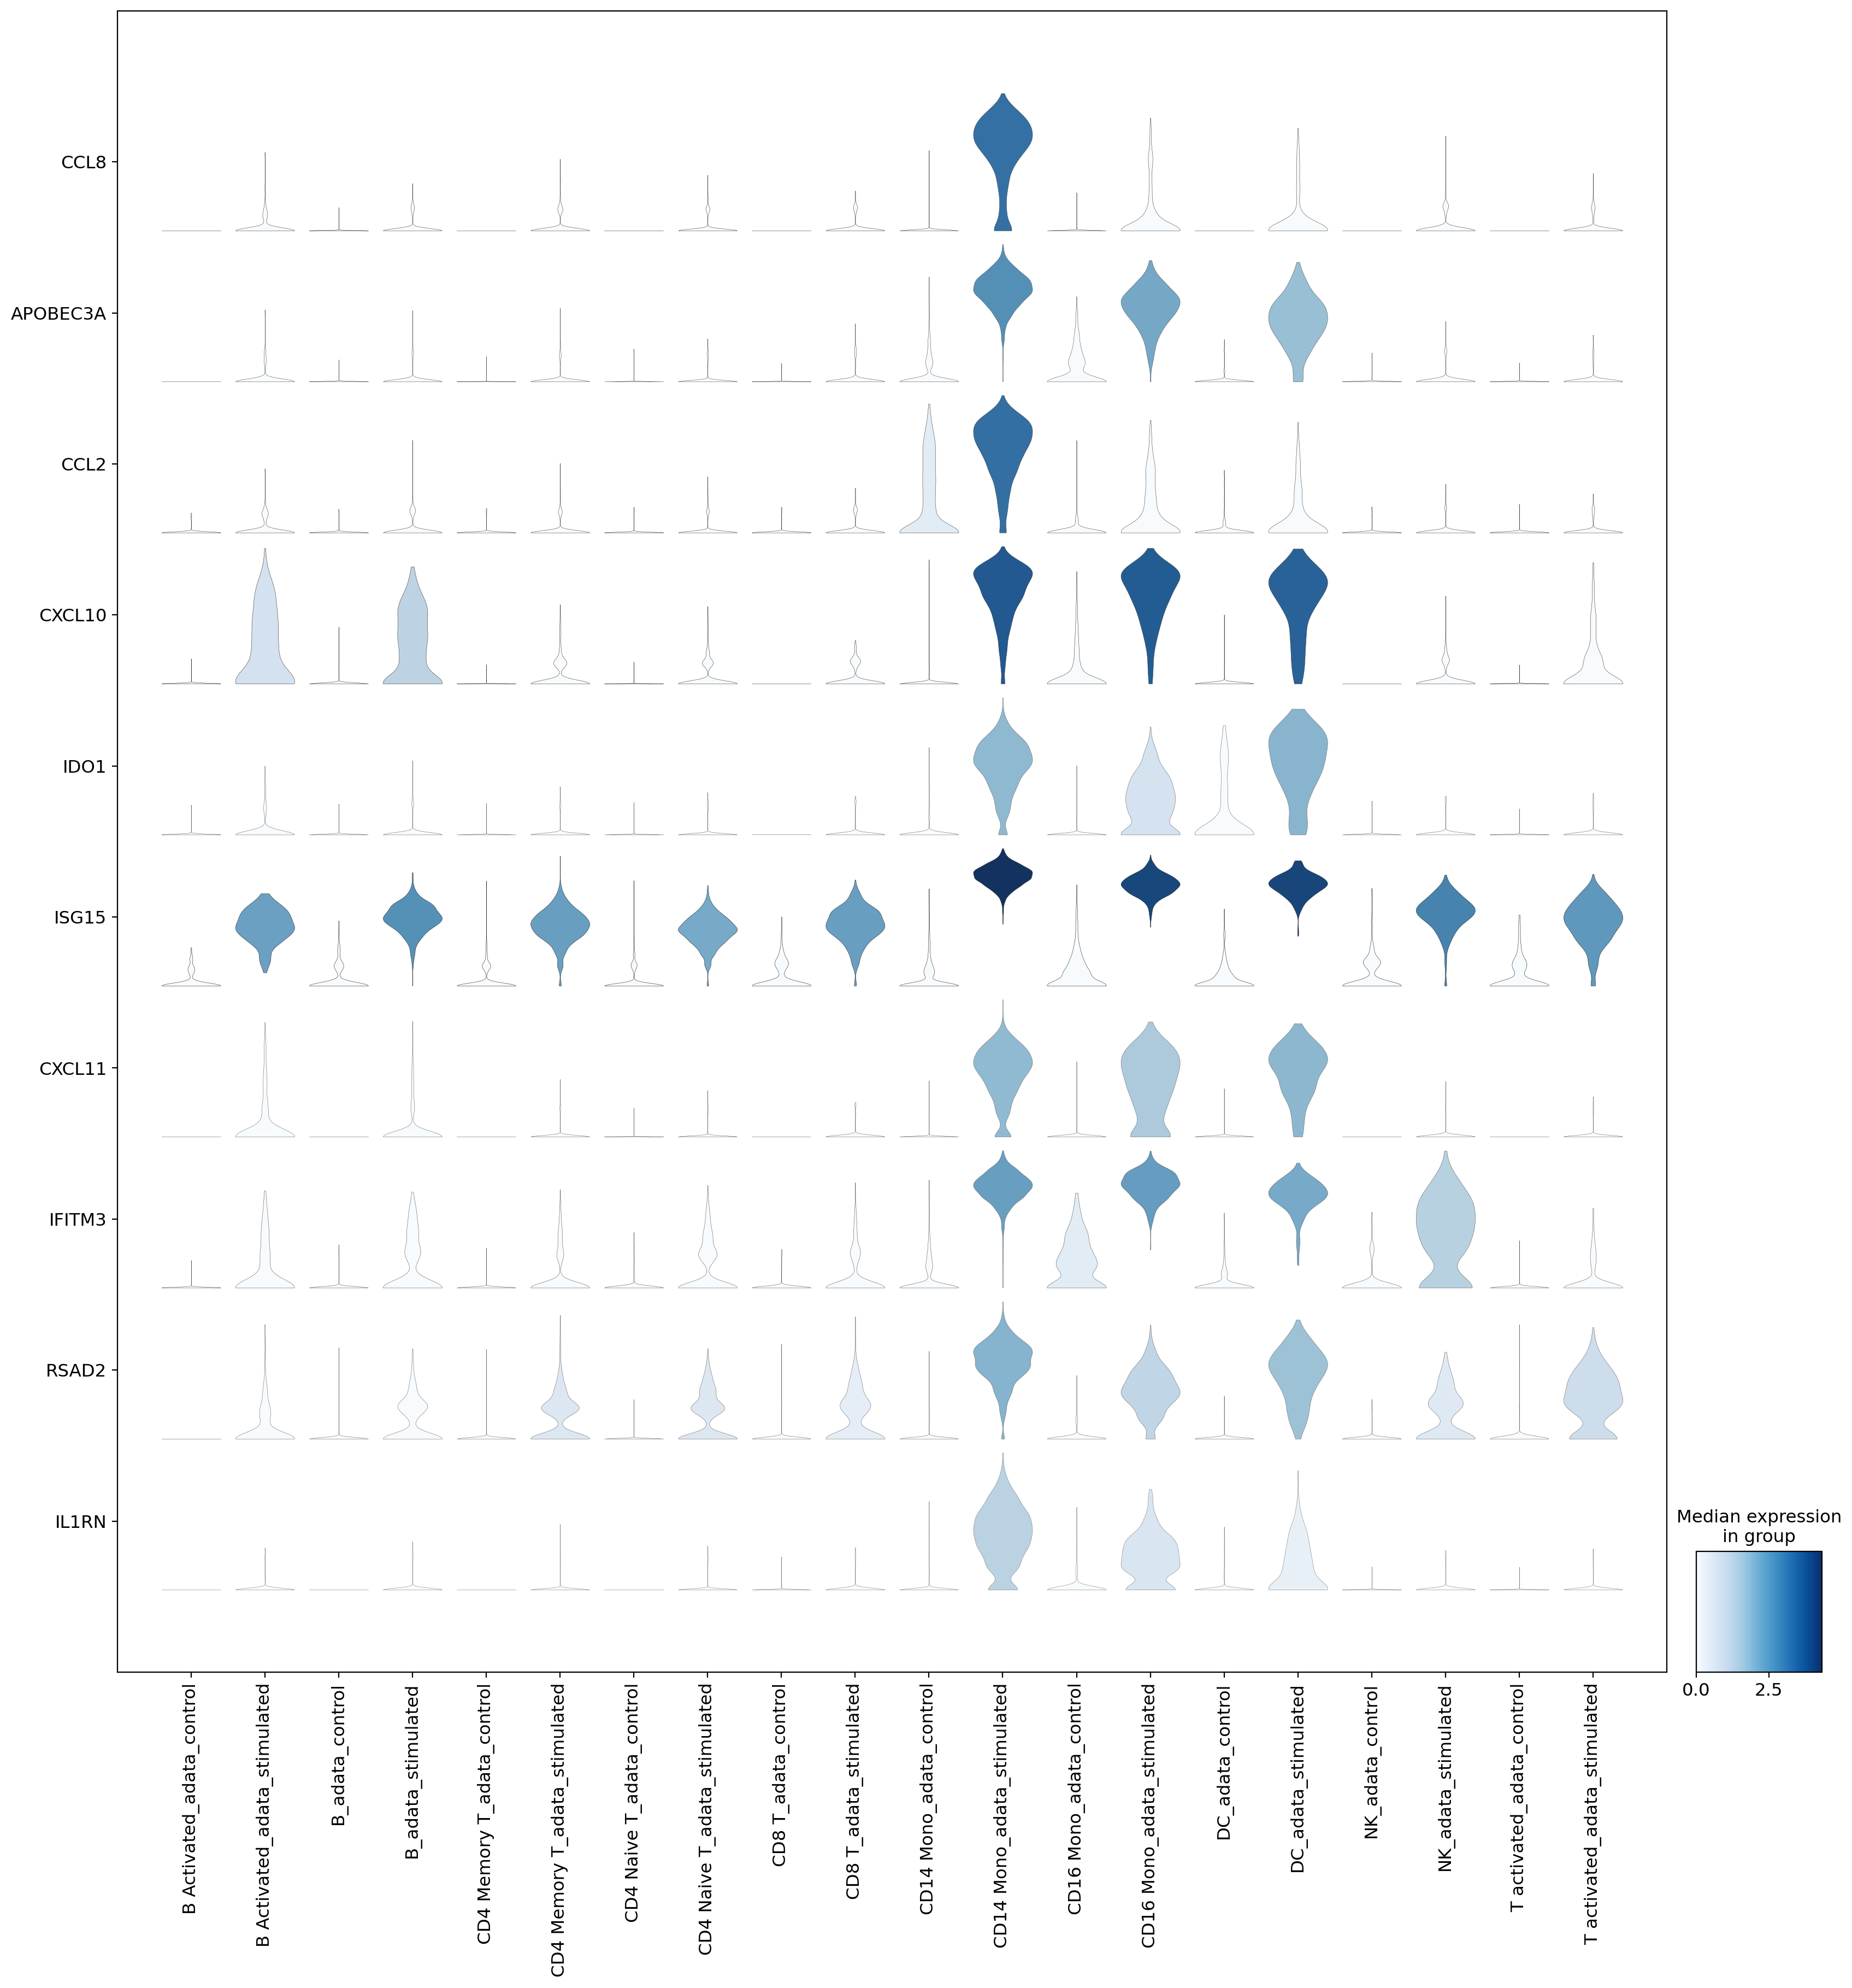

In [45]:
sc.pl.stacked_violin(
    adata_preds[adata_preds.obs['model'].str.contains("control|stimulated|mse", regex=True)],
    groupby='model',
    var_names=genes,
    swap_axes=True,
    figsize=(20, 20)
)

In [46]:
adata_preds_sub = adata_preds[adata_preds.obs['model'].str.contains('CD14 Mono')]

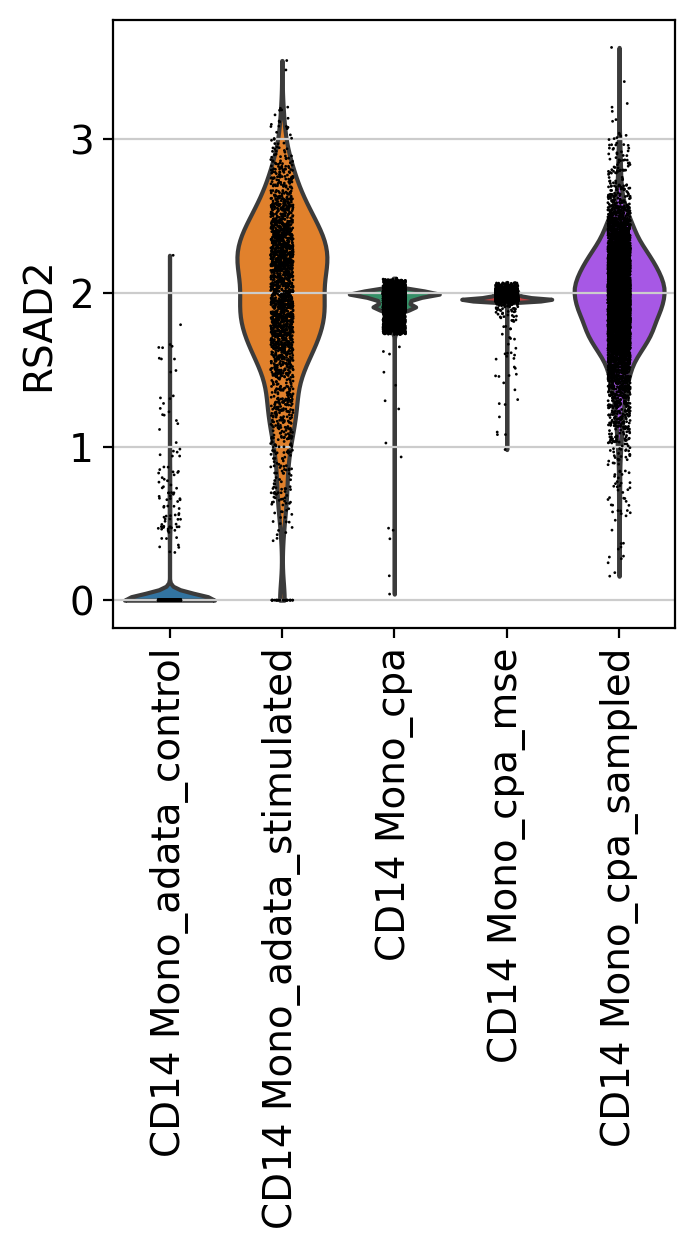

In [47]:
sc.pl.violin(adata_preds_nk, groupby='model', keys='RSAD2', rotation=90)